In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
from multiprocessing import Pool
import random

In [3]:
#syarat awal
jumlah_x = 20
jumlah_y = 20
jumlah_titik = jumlah_x*jumlah_y

#syarat awal rho
jumlah_titik_x = np.arange(0, jumlah_x)
jumlah_titik_y = np.arange(0, jumlah_y)
titik_pusat = np.arange(1,jumlah_x) # nilai titik pusat
varian = np.arange(1,jumlah_x) # nilai varian

jumlah_data = (len(varian)**2)*(len(titik_pusat)**2)
o = p = f = d =0

data_rho = np.zeros((jumlah_data,jumlah_titik)) #disesuaikan dengan jumlah data yang mau diambil
rho_2d = np.zeros(jumlah_titik)

#syarat awal phi
delta_x = 0.5
delta_y = 0.5
jumlah_iterasi = 100
epsilon_nol = 1

iterasi = np.arange(0,jumlah_iterasi)
temp = np.zeros((jumlah_y,jumlah_x))
phi = np.zeros((jumlah_y,jumlah_x))
data_phi = np.zeros((jumlah_data, jumlah_x, jumlah_y))

#rho
for y_0 in (titik_pusat):
    for x_0 in (titik_pusat):
        for varian_y in (varian):
            for varian_x in (varian):
                for y in (jumlah_titik_y):
                    for x in (jumlah_titik_x):
                        gauss_2dimensi = np.exp(-(((x-x_0)**2/(2*varian_x**2))+((y-y_0)**2)/(2*varian_y**2)))
                        #print('n=',n, 'm=',m, 'tipus=', titik_pusat[k-1], 'varian=',varian[l-1], 'gauss=',gauss_2dimensi)
                        data_rho[o,p] = gauss_2dimensi
                        if p < jumlah_titik-1:
                            p = p+1
                        else:
                            p = 0
                            o = o + 1 

KeyboardInterrupt: 

In [1]:
titik_pusat.shape

NameError: name 'titik_pusat' is not defined

In [34]:
data_rho.shape

(130321, 400)

In [35]:
np.savetxt('rho_dua_dimensi_cartesian_data_tanpa_mp.csv', data_rho, fmt = '%.11f', delimiter=',')

In [36]:
len(data_rho)

130321

In [37]:
data_training = np.loadtxt('rho_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',').reshape(len(data_rho),jumlah_y,jumlah_x)

In [38]:
data_training.shape

(130321, 20, 20)

In [39]:
plot_x = np.linspace(0,19,20)
plot_y = np.linspace(0,19,20)
plot_x, plot_y = np.meshgrid(plot_x, plot_y)

91827


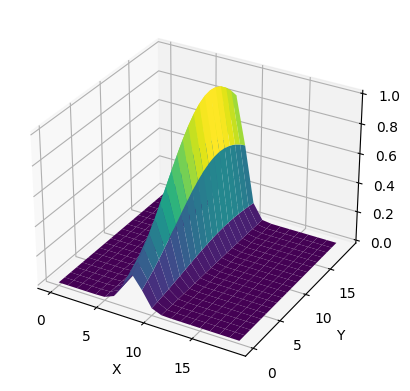

In [112]:
index_rho = random.randint(0,data_training.shape[0])
print(index_rho)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_x, plot_y, data_training[index_rho], cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [41]:
def phi_hitung(g):    
    for h in (iterasi):
        #print(' h=',h)
        for j in range (1, jumlah_y-1):
            #print('   j=',j)
            for i in range (1, jumlah_x-1):
                    #print('     i=',i)
                    phi[j,i] = ((((temp[j, i+1]+temp[j, i-1])/delta_x**2)+((temp[j+1, i]+temp[j-1, i])/delta_y**2)+\
                                (data_training[g,j,i]/epsilon_nol))/2)*(delta_x**2 * delta_y**2)/(delta_y**2 + delta_x**2)
                    #print('rho=', data_training[g,j,i], 'phi=', phi[j,i])
                    temp[j,i] = phi[j,i]
    return phi

In [42]:
for g in range(len(data_training)):
    phi_hitung(g)
    data_phi[g,:,:]=phi
    

In [50]:
data_phi.shape

(130321, 20, 20)

In [78]:
data_phi

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.19175221e-01, 1.13351481e-01, ...,
         1.86851467e-04, 9.03996087e-05, 0.00000000e+00],
        [0.00000000e+00, 1.13351481e-01, 1.18350583e-01, ...,
         3.62334421e-04, 1.75475266e-04, 0.00000000e+00],
        ...,
        [0.00000000e+00, 1.86851467e-04, 3.62334421e-04, ...,
         1.62061876e-04, 8.09909108e-05, 0.00000000e+00],
        [0.00000000e+00, 9.03996087e-05, 1.75475266e-04, ...,
         8.09909108e-05, 4.04954554e-05, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.42539960e-01, 1.76630382e-01, ...,
         5.55605751e-04, 2.68616075e-04, 0.00000000e+00],
        [0.00000000e+00, 

129375


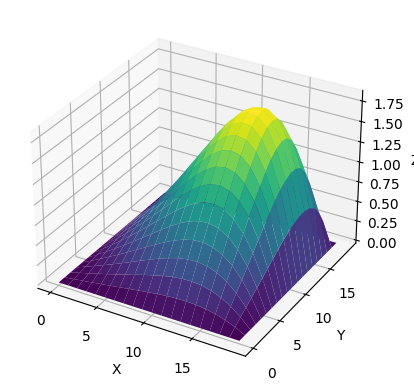

In [99]:
index_phi = random.randint(0,data_phi.shape[0])
print(index_phi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_x, plot_y, data_phi[index_phi], cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [45]:
data_phi_fix=data_phi.reshape(jumlah_data, jumlah_titik)

In [46]:
data_phi_fix.shape

(130321, 400)

In [47]:
np.savetxt('phi_dua_dimensi_cartesian_data_tanpa_mp.csv', data_phi_fix, fmt = '%.15f', delimiter=',') #penyimpanan hasil phi